#Credit Risk Analysis

In [3]:
import pandas as pd
import re
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from datetime import datetime
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics



In [64]:
df = pd.read_csv("data.csv")
df.head()

C:\Users\Vedant\AppData\Local\Temp\ipykernel_11184\2036481670.py:1: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
df.shape

(855969, 73)

In [6]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,...,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,...,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,...,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049,0.226581
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,9.067986e+06,1.079273e+07,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,...,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000,0.000000
50%,3.431355e+07,3.697532e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,...,75.000000,1.000000,2.000000,4485.500000,62.100000,2.380000e+04,0.000000,0.000000,2.000000,0.000000
75%,5.446311e+07,5.803559e+07,20000.000000,20000.000000,20000.000000,15.990000,571.560000,9.000000e+04,23.900000,0.000000,...,87.500000,2.000000,4.000000,7701.250000,75.300000,3.990000e+04,1.000000,2.000000,3.000000,0.000000
max,6.861687e+07,7.351969e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,223.300000,22.000000,43.000000,83047.000000,151.400000,9.999999e+06,15.000000,33.000000,32.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           855969 non-null  int64  
 1   member_id                    855969 non-null  int64  
 2   loan_amnt                    855969 non-null  int64  
 3   funded_amnt                  855969 non-null  int64  
 4   funded_amnt_inv              855969 non-null  float64
 5   term                         855969 non-null  object 
 6   int_rate                     855969 non-null  float64
 7   installment                  855969 non-null  float64
 8   grade                        855969 non-null  object 
 9   sub_grade                    855969 non-null  object 
 10  emp_title                    806526 non-null  object 
 11  emp_length                   812908 non-null  object 
 12  home_ownership               855969 non-null  object 
 13 

In [65]:
#removing unwanted features
to_be_removed = ['zip_code','emp_title','purpose','title','addr_state']
df.drop(to_be_removed,axis=1,inplace=True)
df.shape

(855969, 68)

In [9]:
df.isnull().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
total_rev_hi_lim     67313
inq_fi              842681
total_cu_tl         842681
inq_last_12m        842681
default_ind              0
Length: 68, dtype: int64

In [66]:
# Calculating the percentage of non-null values in each column
non_null_percentage = df.count()/len(df)*100
thresold = 90
#Getting the column names with non-null above the thresold percentage

column_useful = non_null_percentage[non_null_percentage>=thresold].index

df_filtered = df[column_useful]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 46 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          855969 non-null  int64  
 1   member_id                   855969 non-null  int64  
 2   loan_amnt                   855969 non-null  int64  
 3   funded_amnt                 855969 non-null  int64  
 4   funded_amnt_inv             855969 non-null  float64
 5   term                        855969 non-null  object 
 6   int_rate                    855969 non-null  float64
 7   installment                 855969 non-null  float64
 8   grade                       855969 non-null  object 
 9   sub_grade                   855969 non-null  object 
 10  emp_length                  812908 non-null  object 
 11  home_ownership              855969 non-null  object 
 12  annual_inc                  855969 non-null  float64
 13  verification_s

In [67]:
#Dropping the null values
df_filtered = df_filtered.dropna()
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 739035 entries, 39694 to 855968
Data columns (total 46 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          739035 non-null  int64  
 1   member_id                   739035 non-null  int64  
 2   loan_amnt                   739035 non-null  int64  
 3   funded_amnt                 739035 non-null  int64  
 4   funded_amnt_inv             739035 non-null  float64
 5   term                        739035 non-null  object 
 6   int_rate                    739035 non-null  float64
 7   installment                 739035 non-null  float64
 8   grade                       739035 non-null  object 
 9   sub_grade                   739035 non-null  object 
 10  emp_length                  739035 non-null  object 
 11  home_ownership              739035 non-null  object 
 12  annual_inc                  739035 non-null  float64
 13  verification_st

In [12]:
df_filtered.shape

(739035, 46)

In [13]:
df_filtered.select_dtypes(exclude=['int64','float64']).head(10)

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
39694,36 months,B,B2,10+ years,OWN,Verified,01-12-2013,n,01-10-1986,w,01-01-2016,01-12-2015,INDIVIDUAL
39695,36 months,C,C1,1 year,RENT,Not Verified,01-12-2013,n,01-01-2007,f,01-01-2016,01-01-2016,INDIVIDUAL
39696,36 months,A,A2,10+ years,MORTGAGE,Not Verified,01-12-2013,n,01-03-1994,w,01-01-2016,01-01-2016,INDIVIDUAL
39697,36 months,B,B5,10+ years,RENT,Source Verified,01-12-2013,n,01-10-1998,w,01-09-2015,01-01-2016,INDIVIDUAL
39698,36 months,A,A5,2 years,MORTGAGE,Not Verified,01-12-2013,n,01-03-1998,w,01-01-2016,01-01-2016,INDIVIDUAL
39699,36 months,B,B3,10+ years,MORTGAGE,Source Verified,01-12-2013,n,01-11-1997,f,01-01-2016,01-01-2016,INDIVIDUAL
39700,36 months,B,B4,4 years,RENT,Not Verified,01-12-2013,n,01-06-1988,f,01-01-2016,01-01-2016,INDIVIDUAL
39701,36 months,C,C5,3 years,RENT,Not Verified,01-12-2013,n,01-10-2010,w,01-01-2016,01-01-2016,INDIVIDUAL
39702,36 months,B,B1,7 years,MORTGAGE,Not Verified,01-12-2013,n,01-10-1989,f,01-01-2016,01-01-2016,INDIVIDUAL
39703,36 months,B,B4,10+ years,RENT,Verified,01-12-2013,n,01-05-1991,f,01-07-2014,01-01-2016,INDIVIDUAL


In [68]:
df_filtered['term']=df_filtered['term'].str.extract('(\d+)')
df_filtered['term']=df_filtered['term'].astype(int)


In [69]:
df_filtered['emp_length']=df_filtered['emp_length'].str.extract('(\d+)')
df_filtered['emp_length']=df_filtered['emp_length'].astype(float)


In [16]:
def encode_verification(x):
  if x=='Verified':
    return 2
  elif x == 'Source Verified':
    return 1
  else:
    return 0

In [70]:
df_filtered['verification_status']=df_filtered['verification_status'].apply(encode_verification)


In [18]:
def encode_grade(x):
  if x=='A':
    return 0
  elif x=='B':
    return 1
  elif x=='C':
    return 2
  elif x=='D':
    return 3
  elif x=='E':
    return 4
  elif x=='F':
    return 5
  else:
    return 6


In [71]:
df_filtered['grade']=df_filtered['grade'].apply(encode_grade)

In [20]:
def encode_payment(x):
  if x=='n':
    return 0
  else :
    return 1

In [72]:
df_filtered['pymnt_plan']=df_filtered['pymnt_plan'].apply(encode_payment)

In [22]:
def encode_initial (x):
    if x == 'w':
        return 1
    else:
        return 0


In [73]:
df_filtered['initial_list_status'] = df_filtered['initial_list_status'].apply(encode_initial)


In [74]:
#Removing the rows with 'ANY' to get the encoding
df_filtered = df_filtered[df_filtered['home_ownership']!='ANY']
home_type = ['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE']  # Unique values for encoding

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Fit the encoder on the grades
encoder.fit(home_type)

# Encode the 'grade' column in the DataFrame
df_filtered['home_ownership'] = encoder.transform(df_filtered['home_ownership'])

In [75]:
subgrades = ['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5']

def custom_sort_key(subgrade):
    match = re.match(r'([A-Za-z]+)(\d+)', subgrade)
    letter = match.group(1)
    number = int(match.group(2))

    return letter, number

sorted_subgrades = sorted(subgrades, key=custom_sort_key)

# Level encoding for sorted sub-grade

encoder = LabelEncoder()

# Fit the encoder on the grades
encoder.fit(sorted_subgrades)

# Encode the 'grade' column in the DataFrame
df_filtered['sub_grade'] = encoder.transform(df_filtered['sub_grade'])

In [76]:
type = ['INDIVIDUAL', 'JOINT'] # Unique values for encoding

encoder = LabelEncoder()

encoder.fit(type)

df_filtered['application_type'] = encoder.transform(df_filtered['application_type'])

In [77]:
df_filtered = df_filtered.drop(['issue_d','last_pymnt_d'], axis=1)
df_filtered.shape

(739033, 44)

In [28]:
def date_difference(date_str1,date_str2):
  date_format = "%d-%m-%Y"
  date1 = datetime.strptime(date_str1,date_format)
  date2 = datetime.strptime(date_str2,date_format)
  difference = date2-date1
  return difference.days


In [78]:
df_filtered['credit_history_length'] = df_filtered.apply(lambda row : date_difference(row['earliest_cr_line'], row['last_credit_pull_d']),axis=1)


In [79]:
df_filtered['default_ind'],df_filtered['credit_history_length'] = df_filtered['credit_history_length'],df_filtered['default_ind']

In [80]:
df_filtered.rename(columns={'default_ind': 'credit_history_length', 'credit_history_length': 'default_ind'}, inplace=True)

In [32]:
df_filtered.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,credit_history_length,default_ind
39694,10149342,12000897,27050,27050,27050.0,36,10.99,885.46,1,6,...,01-12-2015,0.0,1,0,0,0.0,114834.0,59900.0,10653,0
39695,10159584,12011200,9750,9750,9750.0,36,13.98,333.14,2,10,...,01-01-2016,0.0,1,0,0,0.0,14123.0,15100.0,3287,0
39696,10159498,1319523,12000,12000,12000.0,36,6.62,368.45,0,1,...,01-01-2016,0.0,1,0,0,0.0,267646.0,61100.0,7976,0
39697,10139658,11991209,12000,12000,12000.0,36,13.53,407.40,1,9,...,01-01-2016,0.0,1,0,0,15386.0,13605.0,8100.0,6301,0
39698,10159548,12011167,15000,15000,15000.0,36,8.90,476.30,0,4,...,01-01-2016,0.0,1,0,0,1514.0,272492.0,15400.0,6515,0
39699,10119623,11971241,12000,12000,12000.0,36,11.99,398.52,1,7,...,01-01-2016,0.0,1,0,0,0.0,327264.0,16200.0,6635,0
39700,10129477,11981093,14000,14000,14000.0,36,12.85,470.71,1,8,...,01-01-2016,0.0,1,0,0,0.0,17672.0,4500.0,10075,0
39701,10129403,11981032,7550,7550,7550.0,36,16.24,266.34,2,14,...,01-01-2016,0.0,1,0,0,0.0,5759.0,8000.0,1918,0
39702,10159611,12011228,10000,10000,10000.0,36,9.67,321.13,1,5,...,01-01-2016,0.0,1,0,0,0.0,39143.0,22300.0,9588,0
39703,10179520,12031088,3000,3000,3000.0,36,12.85,100.87,1,8,...,01-01-2016,0.0,1,0,0,154.0,19530.0,5300.0,9011,0


In [81]:
#removing the trivial features
remove_col = ['id','member_id','last_credit_pull_d','earliest_cr_line','policy_code']
df_filtered = df_filtered.drop(remove_col,axis=1)


In [34]:
df_filtered.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
pymnt_plan                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pym

C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

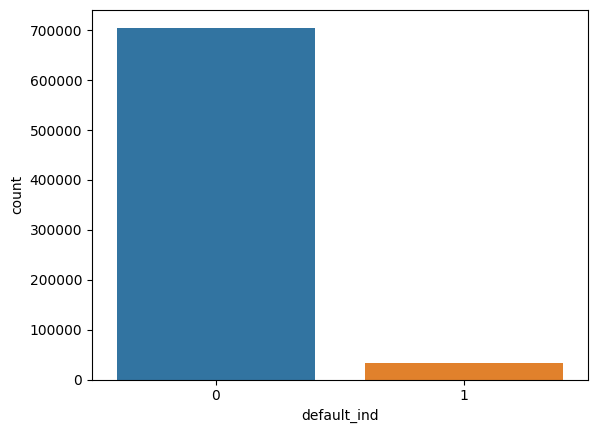

In [35]:
sns.countplot(data=df_filtered,x='default_ind')
plt.show()

C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

Text(0.5, 0, 'Interest Rate')

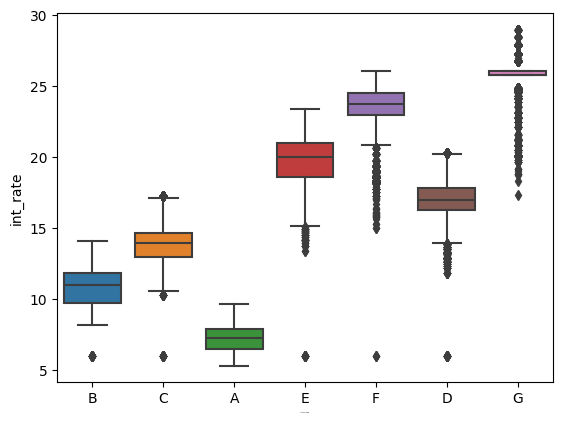

In [36]:
sns.boxplot(x = df['grade'], y = df['int_rate']).set_xlabel("Interest Rate", fontsize=1)


Exploratory Data Analysis

                       Feature  Importance
21                  recoveries    0.317464
17                   out_prncp    0.212878
22             last_pymnt_amnt    0.135283
18                 total_pymnt    0.127765
0                    loan_amnt    0.053863
19               total_rec_int    0.028041
2                     int_rate    0.020419
20          total_rec_late_fee    0.013063
13                   revol_bal    0.009648
8                          dti    0.009424
1                         term    0.009125
27                 tot_cur_bal    0.008568
5                   annual_inc    0.008248
14                  revol_util    0.008172
28       credit_history_length    0.007504
15                   total_acc    0.006039
11                    open_acc    0.005207
6          verification_status    0.003625
3                   emp_length    0.003285
16         initial_list_status    0.003019
10              inq_last_6mths    0.002898
26                tot_coll_amt    0.001951
9          

C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

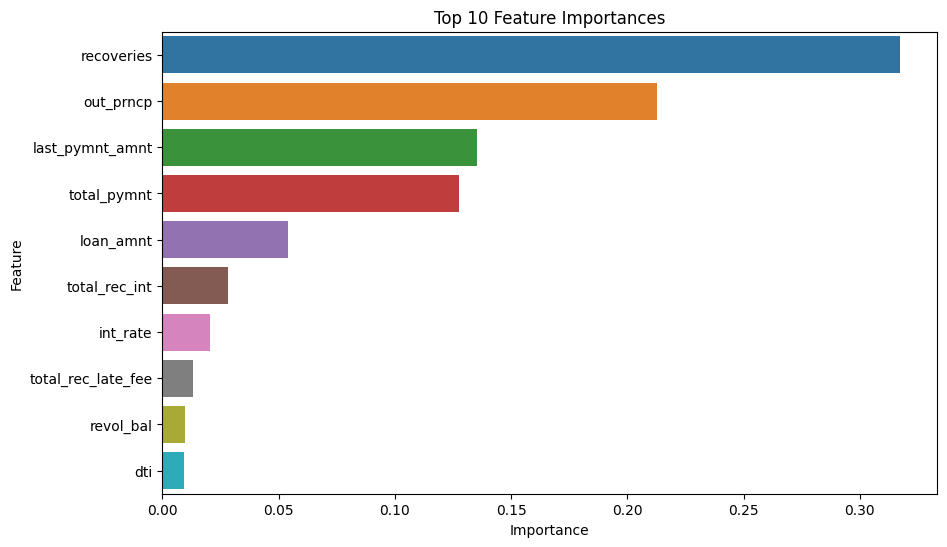

In [56]:
df_filtered.head(10)
df_filtered.columns

def rf_feat_importance(rfr, df):
    return pd.DataFrame({'cols':df.columns, 'imp':rfr.feature_importances_}
                       ).sort_values('imp', ascending=False)

# Separate the target variable (y) and features (X)
X = df_filtered.drop('default_ind', axis=1)  
y = df_filtered['default_ind']

# Initialize a Random Forest classifier
clf = RandomForestClassifier()

# Fit the model to your data
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to display the importances along with feature names
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importance
print(feature_importance_df)

# You can also plot the feature importances
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances')
plt.show()

#recoveries, funded amount, dti, sub grade, int_rate, total_curr bal

In [ ]:
#Removing the outliers

C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='dti'>

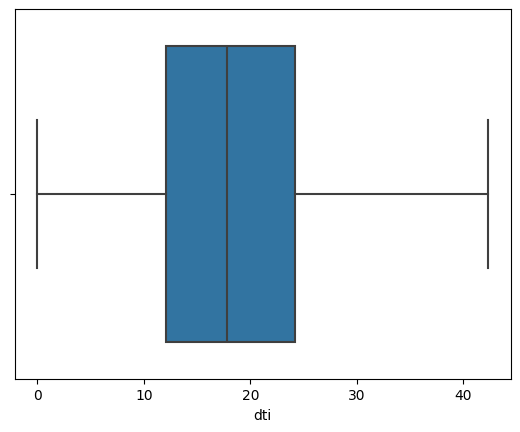

In [82]:

mean = np.mean(df_filtered['dti'])
std = np.std(df_filtered['dti'])
df_filtered = df_filtered[df_filtered['dti']<= mean+3*std]
df_filtered = df_filtered[df_filtered['dti']>= mean-3*std]

mean = np.mean(df_filtered['recoveries'])
std = np.std(df_filtered['recoveries'])
df_filtered = df_filtered[df_filtered['recoveries']<= mean+3*std]
df_filtered = df_filtered[df_filtered['recoveries']>= mean-3*std]

mean = np.mean(df_filtered['total_pymnt'])
std = np.std(df_filtered['total_pymnt'])
df_filtered = df_filtered[df_filtered['total_pymnt']<= mean+3*std]
df_filtered = df_filtered[df_filtered['total_pymnt']>= mean-3*std]


sns.boxplot(x=df_filtered['dti'])



C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='funded_amnt'>

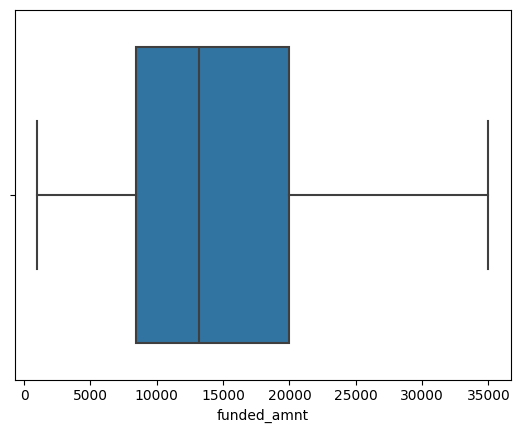

In [83]:
sns.boxplot(x=df_filtered['funded_amnt'])

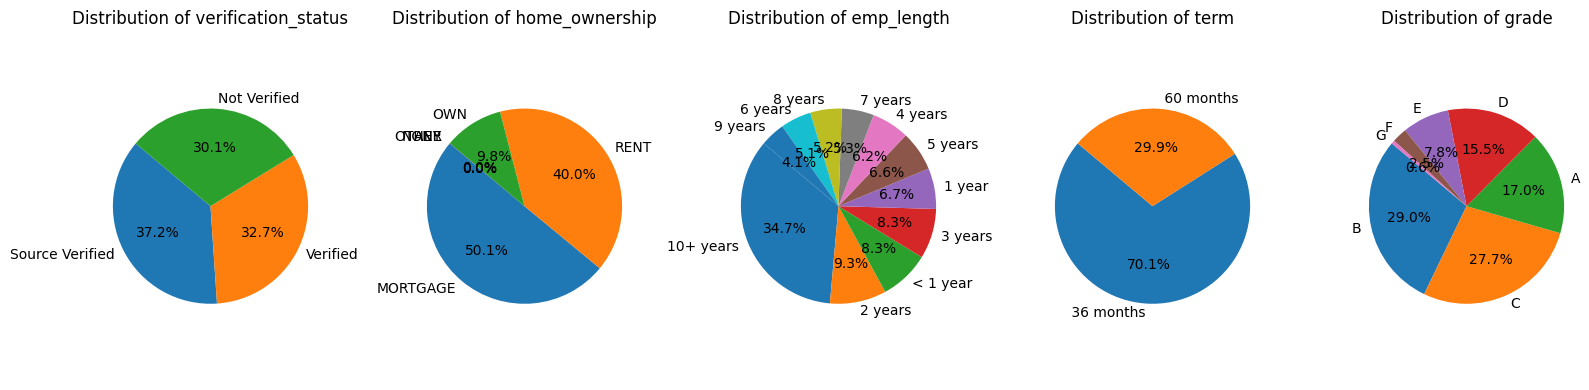

In [59]:
# Categorical columns
categorical_columns = ['verification_status', 'home_ownership', 'emp_length', 'term','grade']

# Create subplots for the categorical columns
fig, axes = plt.subplots(1, len(categorical_columns), figsize=(16, 4))

# Create pie charts for each categorical column
for i, column in enumerate(categorical_columns):
    counts = df[column].value_counts()
    labels = counts.index
    sizes = counts.values
    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

-The verification status is almost distributed equally

-Most of the borrowers live on mortage then rent, very few of them are owners

-Highest amount of borrowers have their employment length more than 10 yrs

-Most of the loans are given on short term basis i.e 36 months return time.

C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

<Axes: xlabel='annual_inc', ylabel='loan_amnt'>

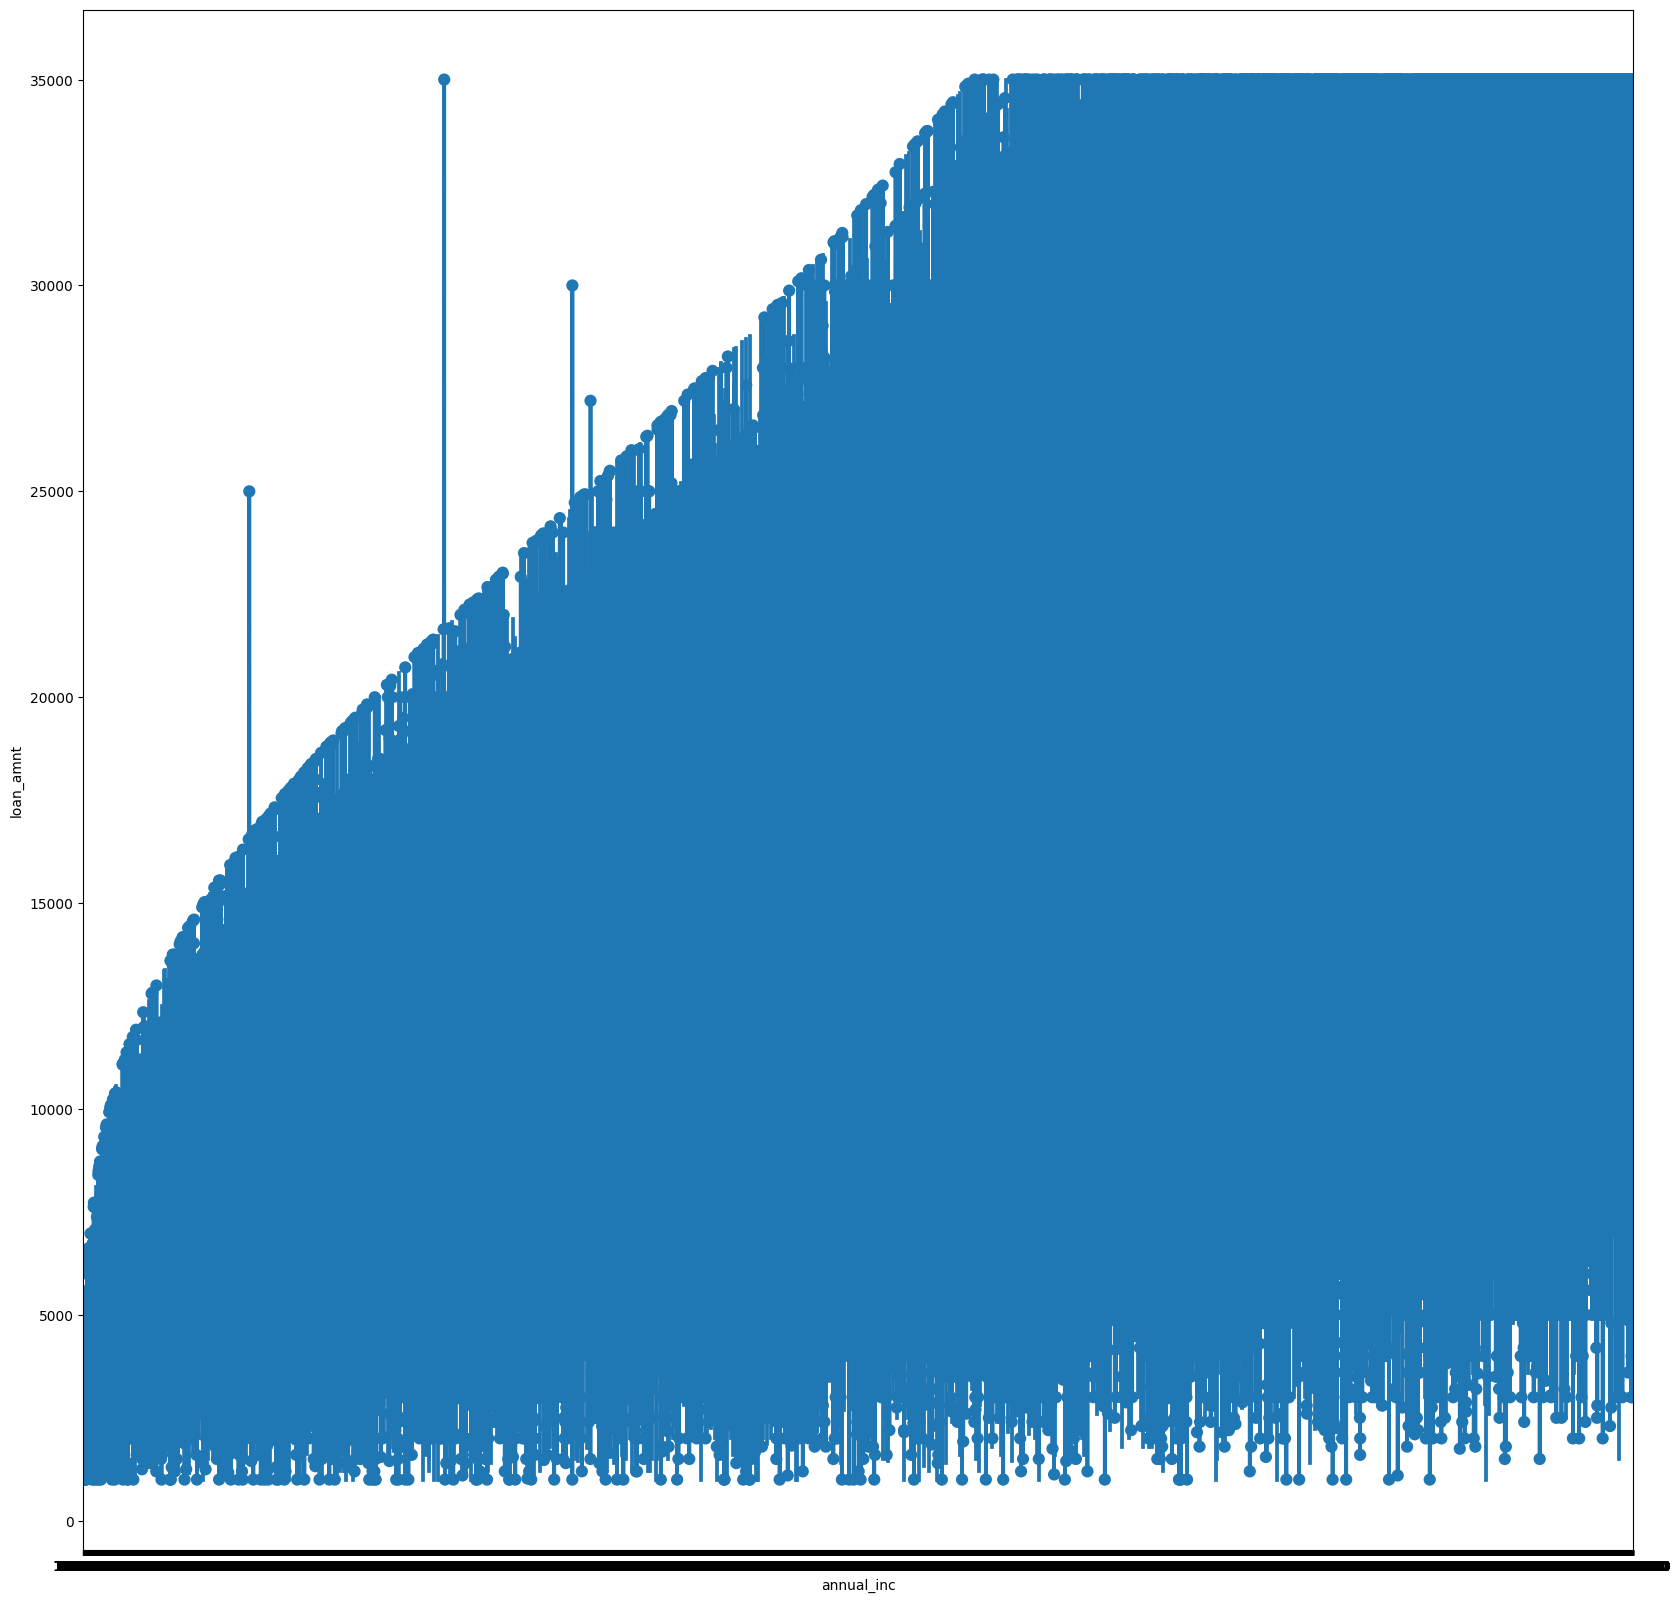

In [60]:
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(20, 20)
sns.pointplot(y =df_filtered['loan_amnt'] ,x=df_filtered['annual_inc'],orient="v")

There is a cap on loan amount to be given based on their annual income. The cap increases quadratically initially and then linearly and finally stops at 35000.

C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

<Axes: xlabel='default_ind', ylabel='dti'>

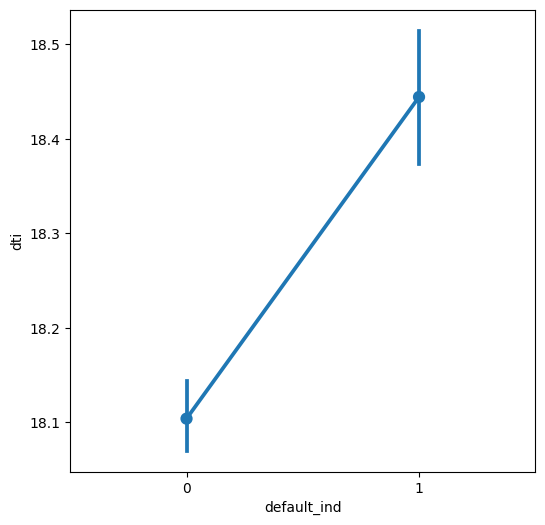

In [62]:
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(6, 6)
sns.pointplot(y =df['dti'] ,x=df['default_ind'])

-As the dti increases that means the borrower has high debt to income ratio so the chances that he will repay is less hence the default index is high i.e 1


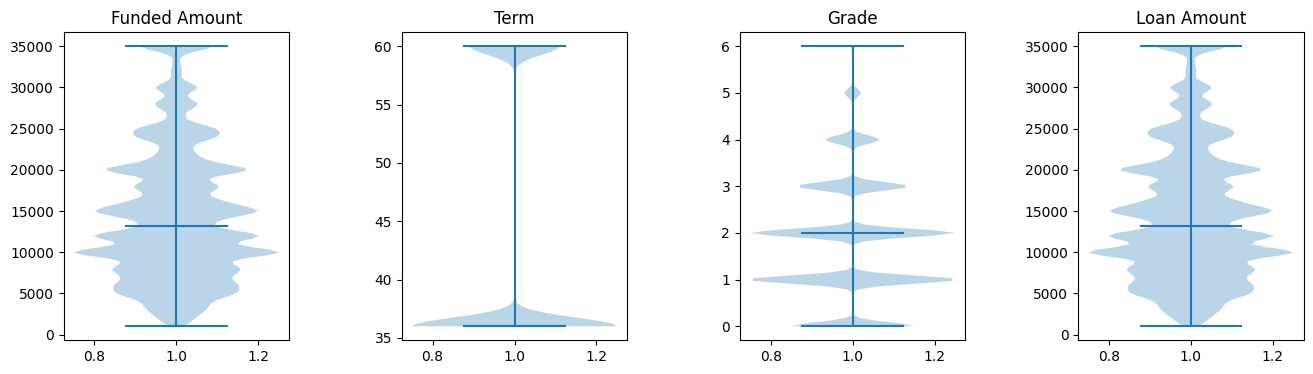

In [84]:
import matplotlib.pyplot as plt
data1 = df_filtered['funded_amnt']
data3 = df_filtered['term']
data4 = df_filtered['grade']
data5 = df_filtered['loan_amnt']
# Create a figure with 8 subplots
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Labels for the violin plots
labels = ["Funded Amount", "Term", "Grade", "Loan Amount"]

# Create violin plots with names
for i, (data, label) in enumerate(zip([data1, data3, data4, data5], labels)):
    ax = axes[i]
    ax.violinplot(data, showmedians=True)
    ax.set_title(label)  # Set the title for each subplot

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5)  # You can adjust the value (0.5 in this case) to control the spacing

# Show the plot
plt.show()

-Average funded amount is around 14000 and range of loan that is being is asked is mostly from 5k-20k

-Grade 2 people are the highest amount of borrowers overall

C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

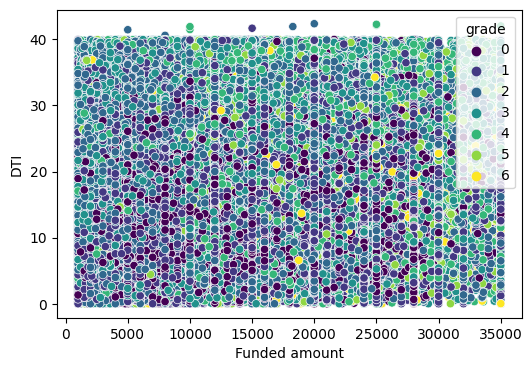

In [85]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='funded_amnt', y='dti', data=df_filtered, hue='grade', palette='viridis')
plt.xlabel('Funded amount')
plt.ylabel('DTI')
plt.legend(title='grade')
plt.show()

As the grade becomes nearer to A funded amount is high (most of the light coloured are at top right)

C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


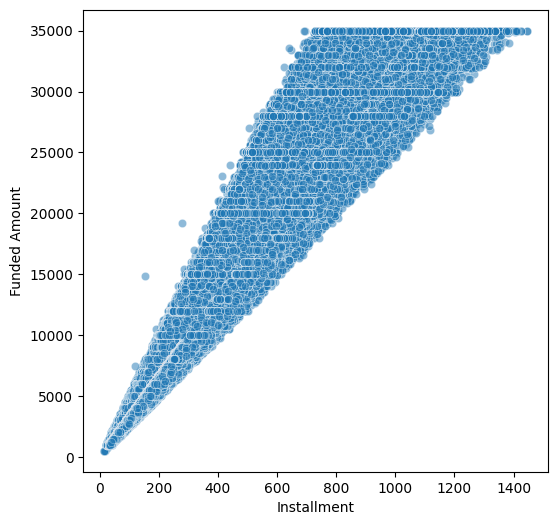

In [86]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=df['installment'], y=df['funded_amnt'], alpha=0.5)
plt.xlabel('Installment')
plt.ylabel('Funded Amount')
plt.show()


As the funded amount increases, the number of installments to return it also increases (obvious)

C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

<Axes: xlabel='grade', ylabel='dti'>

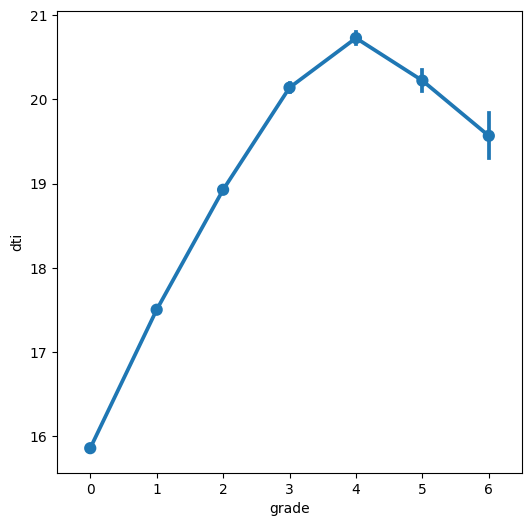

In [87]:
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(6, 6)
sns.pointplot(y =df_filtered['dti'] ,x=df_filtered['grade'],orient="v")

Lower grade means lower dti which means that if a borrower has low debt to income ratio he will get loan from lower grade resulting in less interest rates and also the chances that amount will be recovered is high

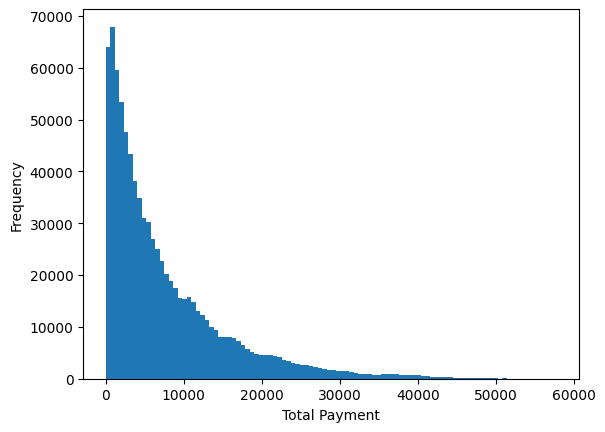

In [88]:
plt.hist(df['total_pymnt'].values, bins=100)
plt.xlabel('Total Payment')
plt.ylabel('Frequency')
plt.show()

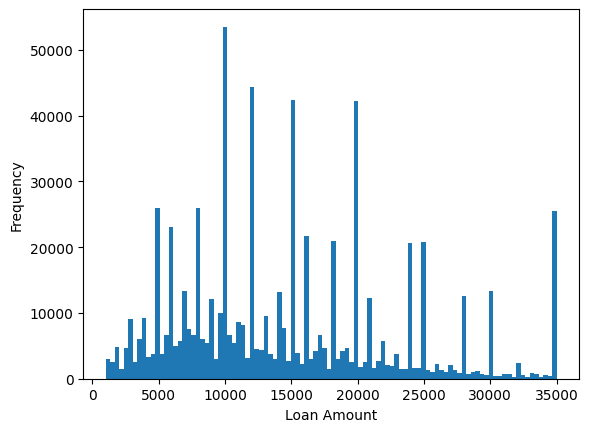

In [89]:
plt.hist(df_filtered['loan_amnt'].values, bins=100)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

Figures like 5k,10k,15k have peaks (people prefer borrowing at steps of 5k) and the region around 5k-15k is dense that means most of the loans are around that range.

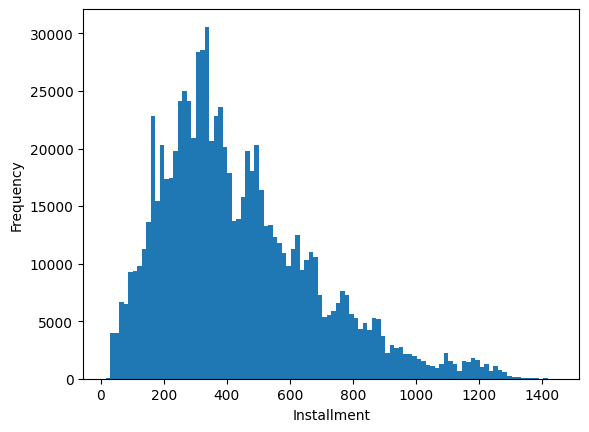

In [90]:
plt.hist(df['installment'].values, bins=100)
plt.xlabel('Installment')
plt.ylabel('Frequency')
plt.show()

C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

<Axes: xlabel='default_ind', ylabel='loan_amnt'>

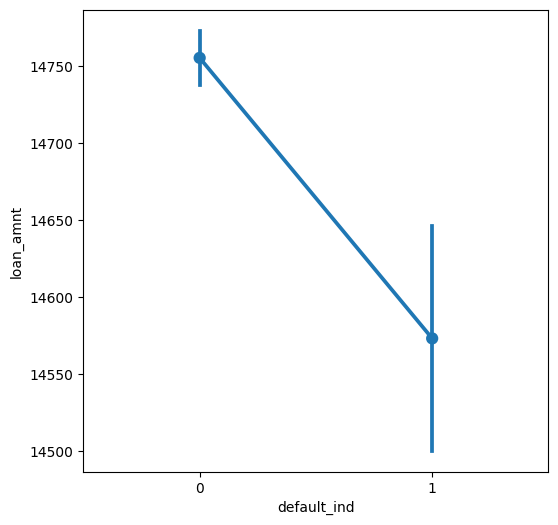

In [95]:
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(6, 6)
sns.pointplot(y =df['loan_amnt'] ,x=df['default_ind'])

Lower loan amount have lower chances that they will be repayed

C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

<Axes: xlabel='dti', ylabel='int_rate'>

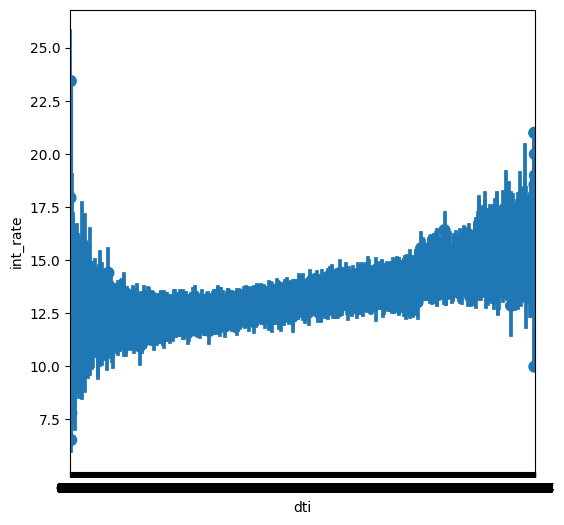

In [92]:
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(6, 6)
sns.pointplot(y =df_filtered['int_rate'] ,x=df_filtered['dti'],orient="v")

Higher the dti, higher the interest rate (increases slowly and linearly)

C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

<Axes: xlabel='emp_length', ylabel='dti'>

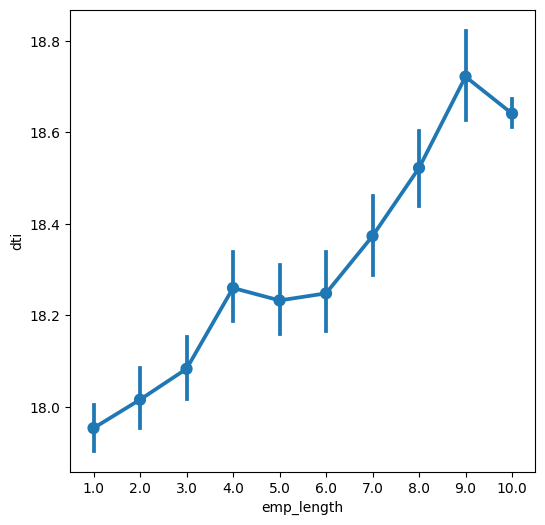

In [93]:
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(6, 6)
sns.pointplot(y =df_filtered['dti'] ,x=df_filtered['emp_length'],orient="v")

C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

<Axes: xlabel='emp_length', ylabel='loan_amnt'>

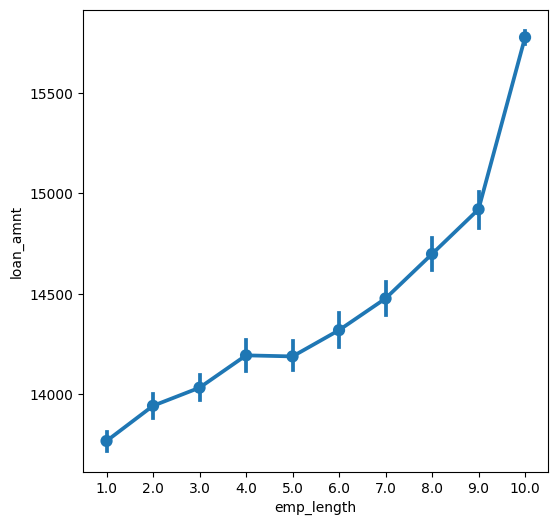

In [94]:
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(6, 6)
sns.pointplot(y =df_filtered['loan_amnt'] ,x=df_filtered['emp_length'],orient="v")

If a person has higher employment length, he can borrow large amount of loan as he will be more credit worthy because of long term income

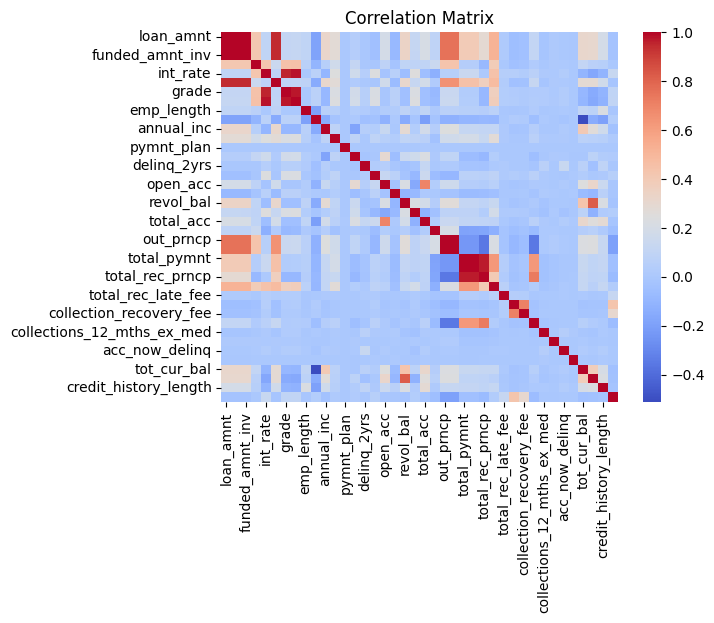

In [96]:
corr_matrix = df_filtered.corr()
sns.heatmap(corr_matrix,annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [97]:
#Removing the correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [98]:
corr_features = correlation(df_filtered, 0.8)
df_filtered = df_filtered.drop(corr_features,axis=1)
df_filtered.shape

(714012, 31)

Model selection and training


In [41]:
input_features = df_filtered.columns.tolist()
target_variable = 'default_ind'
input_features.remove(target_variable)

In [42]:
from sklearn.model_selection import train_test_split
X = df_filtered[input_features]
y = df_filtered[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
y_test.head()

177743    0
320395    0
587412    0
587089    0
196434    0
Name: default_ind, dtype: int64

In [44]:
y_train.value_counts()

default_ind
0    564120
1     27106
Name: count, dtype: int64

Random Classifier

In [99]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [101]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [102]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [105]:
y_pred = rf_classifier.predict(X_test)

In [106]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[141074,      6],
       [   357,   6370]], dtype=int64)

In [48]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9975440946639875
Precision: 0.9990589711417817
Recall: 0.9469302809573361


Hyperparameter Tuning for Random Classifier

In [49]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 150, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [51]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [50, 75, 100, 125, 150], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [52]:
rf_Grid = GridSearchCV(estimator = rf_classifier, param_grid = param_grid, cv = 2, n_jobs = 4)

In [53]:
rf_Grid.fit(X_train, y_train)

C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
160 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
61 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 75, 100, 125, 150]})

In [54]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 125}

In [55]:
print (f'Train Accuracy - : {rf_Grid.score(X_train,y_train)}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test)}')

Train Accuracy - : 0.975249735295809
Test Accuracy - : 0.9753394629483042


In [68]:
rf_Model = RandomForestClassifier(n_estimators = 125, min_samples_split = 2, min_samples_leaf = 1, max_depth = 4, bootstrap = True, random_state=42)
rf_Model.fit(X_train, y_train)
y_pred = rf_Model.predict(X_test)

In [70]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9753394629483042
Precision: 1.0
Recall: 0.458153708934146


With RandomizedSearchCV

In [71]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf_classifier, param_distributions = param_grid, cv = 10, n_jobs = 4)

In [72]:
rf_RandomGrid.fit(X_train, y_train)

C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
70 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [50, 75, 100, 125,
                                                         150]})

In [73]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 125}

In [74]:
rf_RandomGrid.best_params_

{'n_estimators': 125,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 4,
 'bootstrap': False}

In [75]:
rf_Model = RandomForestClassifier(n_estimators = 125, min_samples_split = 2, min_samples_leaf = 2, max_features = 'sqrt', max_depth = 4, bootstrap = False)
rf_Model.fit(X_train, y_train)
y_pred = rf_Model.predict(X_test)

In [80]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.975305635051114
Precision: 1.0
Recall: 0.4574104355581983


In [81]:
print (f'Train Accuracy - : {rf_RandomGrid.score(X_train,y_train)}')
print (f'Test Accuracy - : {rf_RandomGrid.score(X_test,y_test)}')

Train Accuracy - : 0.975249735295809
Test Accuracy - : 0.9753394629483042


Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)
y_logpred = logreg.predict(X_test)

C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [84]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[141080,      0],
       [  3650,   3077]], dtype=int64)

In [85]:
print("Accuracy:",metrics.accuracy_score(y_test, y_logpred))
print("Precision:",metrics.precision_score(y_test, y_logpred))
print("Recall:",metrics.recall_score(y_test, y_logpred))

Accuracy: 0.9980244508040891
Precision: 1.0
Recall: 0.9565928348446558


In [50]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'saga'],
    'max_iter' : [100, 250, 500]
    }
]

In [52]:
from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(estimator = logreg, param_distributions = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [53]:
best_clf = clf.fit(X_train,y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
21 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-pa

In [54]:
best_clf.best_estimator_

LogisticRegression(C=10)

In [46]:
lg_Model = LogisticRegression(penalty='l1', C=0.001, solver='liblinear', max_iter=500)
lg_Model.fit(X_train, y_train)
y_pred = lg_Model.predict(X_test)

C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [49]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[141074,      6],
       [   780,   5947]], dtype=int64)

In [47]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9946822545616919
Precision: 0.9989921048210986
Recall: 0.884049353352163


In [55]:
print (f'Test Accuracy - : {best_clf.score(X_test,y_test)}')
print (f'Train Accuracy - : {best_clf.score(X_train,y_train)}')

Test Accuracy - : 0.9977944211031954
Train Accuracy - : 0.9977859566392547


Conclusion:

In case of Random Forest Classifier, we are getting precision one before and after hyperparameter tuning using grid search and randomized search and also the recall is less than 0.5 which is an ideal scenario.

While, in case of Logistic Regression, we get precision one before hyperparameter tuning and 0.998 after hyperparameter tuning using randomized search. Precision being one is a sign of the model being overfitting. After fine tuning it we get precision less than one and recall less than precision,i.e., the model becomes realistic.